## Credit Card Fraud Detection

This case study aims to build efficient machine learning model that helps banks to predict the fraudulent transactions from a given dataset.To achieve this,efficient techniques will be used to perform data transformations to nullify any inherent skewness and biases,various binary classification models will be built and will be weighed by the performance and best one will be recommended.

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn import preprocessing
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import imblearn
from imblearn.over_sampling import SMOTE
print(imblearn.__version__)

import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


0.4.3


### Loading the data

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory data analysis

In [3]:
#observe the different feature type present in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.shape

(284807, 31)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


#### Missing Data Analysis

In [6]:
round(100*(df.isnull().sum()/len(df.index)),2)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

**Observations:**<br>

There are no missing values in the data.

**Distribution of the target classes**

In [7]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [8]:
nonFraudper = df['Class'].value_counts(normalize=True)[0]
Fraudper = df['Class'].value_counts(normalize=True)[1]


In [9]:
print('Normal share:',normal_share)
print('fraud_share:',fraud_share)

Normal share: 99.82725143693798
fraud_share: 0.1727485630620034


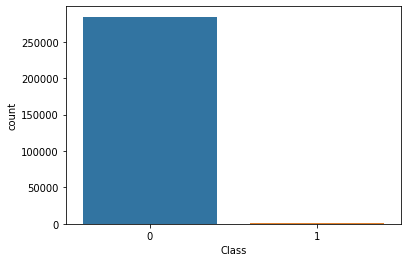

In [10]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
sns.countplot(df['Class'])

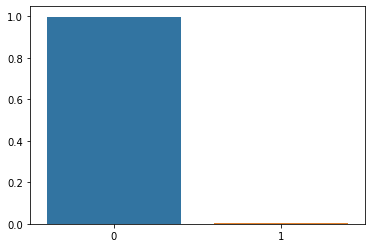

In [11]:
# barplot for the percentage of fraudulent and non-fraudulent transactions
sns.barplot(x=[0,1],y=[nonFraudper,Fraudper])

**Observation:** <br>

There is a high class imbalance in the target classes.

#### Distribution of class with respect to variables - time and Amount

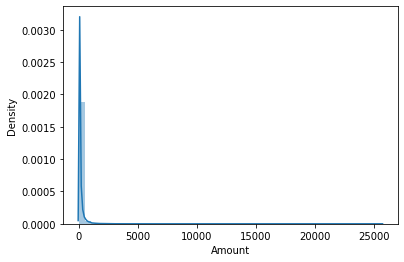

In [12]:
sns.distplot(df['Amount'])

**Observation:** <br>

Amount column is highly right skewed.

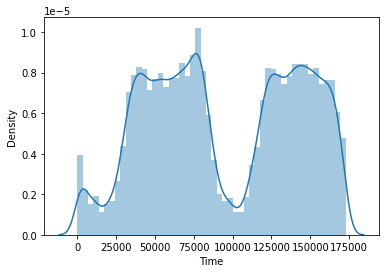

In [13]:
sns.distplot(df['Time'])

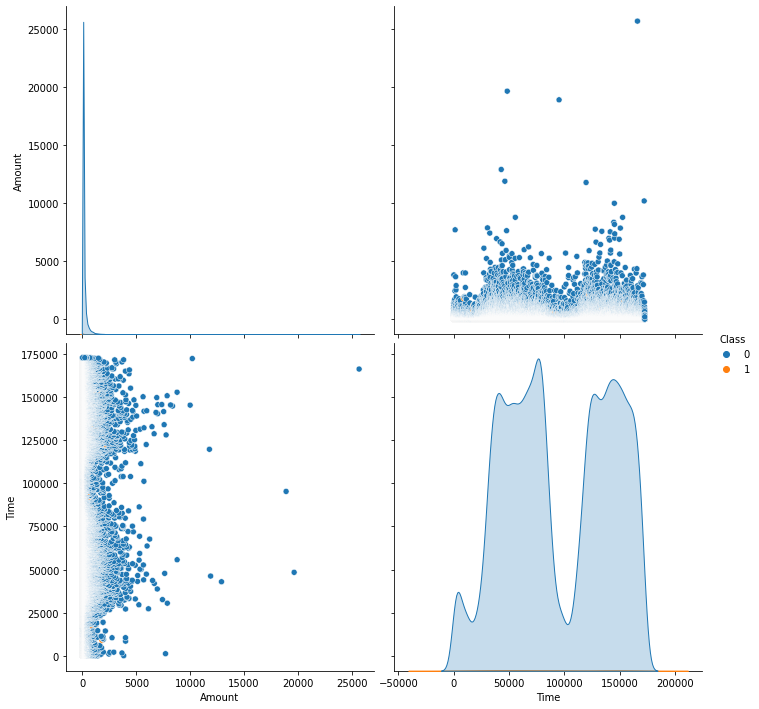

In [14]:
sns.pairplot(df,x_vars=['Amount','Time'],y_vars=['Amount','Time'],hue='Class',size=5)

In [15]:
#Scaling Time and Amount
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df['scaledAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaledTime'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Amount','Time'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   V1            284807 non-null  float64
 1   V2            284807 non-null  float64
 2   V3            284807 non-null  float64
 3   V4            284807 non-null  float64
 4   V5            284807 non-null  float64
 5   V6            284807 non-null  float64
 6   V7            284807 non-null  float64
 7   V8            284807 non-null  float64
 8   V9            284807 non-null  float64
 9   V10           284807 non-null  float64
 10  V11           284807 non-null  float64
 11  V12           284807 non-null  float64
 12  V13           284807 non-null  float64
 13  V14           284807 non-null  float64
 14  V15           284807 non-null  float64
 15  V16           284807 non-null  float64
 16  V17           284807 non-null  float64
 17  V18           284807 non-null  float64
 18  V19 

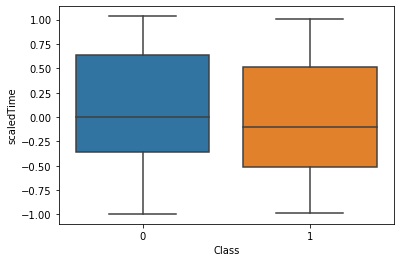

In [16]:
sns.boxplot(x='Class', y='scaledTime', data=df)

Dropping time as not much distinction in class 0 and class 1

In [17]:
# Drop unnecessary columns
# videos suggest to drop time column?
df = df.drop(['scaledTime'],axis=1)

#### Plotting the distribution of variables to check skewness

In [18]:
# plot the histogram of a variable from the dataset to see the skewness
skewed_data = df.skew(axis = 0).sort_values(ascending=False)#, skipna = True) 
skewed_data

Class           23.997579
scaledAmount    16.977724
V28             11.192091
V21              3.592991
V7               2.553907
V6               1.826581
V10              1.187141
V4               0.676292
V26              0.576693
V9               0.554680
V11              0.356506
V19              0.109192
V13              0.065233
V22             -0.213258
V18             -0.259880
V15             -0.308423
V25             -0.415793
V24             -0.552499
V16             -1.100966
V27             -1.170209
V14             -1.995176
V20             -2.037155
V3              -2.240155
V12             -2.278401
V5              -2.425901
V1              -3.280667
V17             -3.844914
V2              -4.624866
V23             -5.875140
V8              -8.521944
dtype: float64

In [19]:
cols = list(df.drop(['Class'],axis=1).columns)
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'scaledAmount']

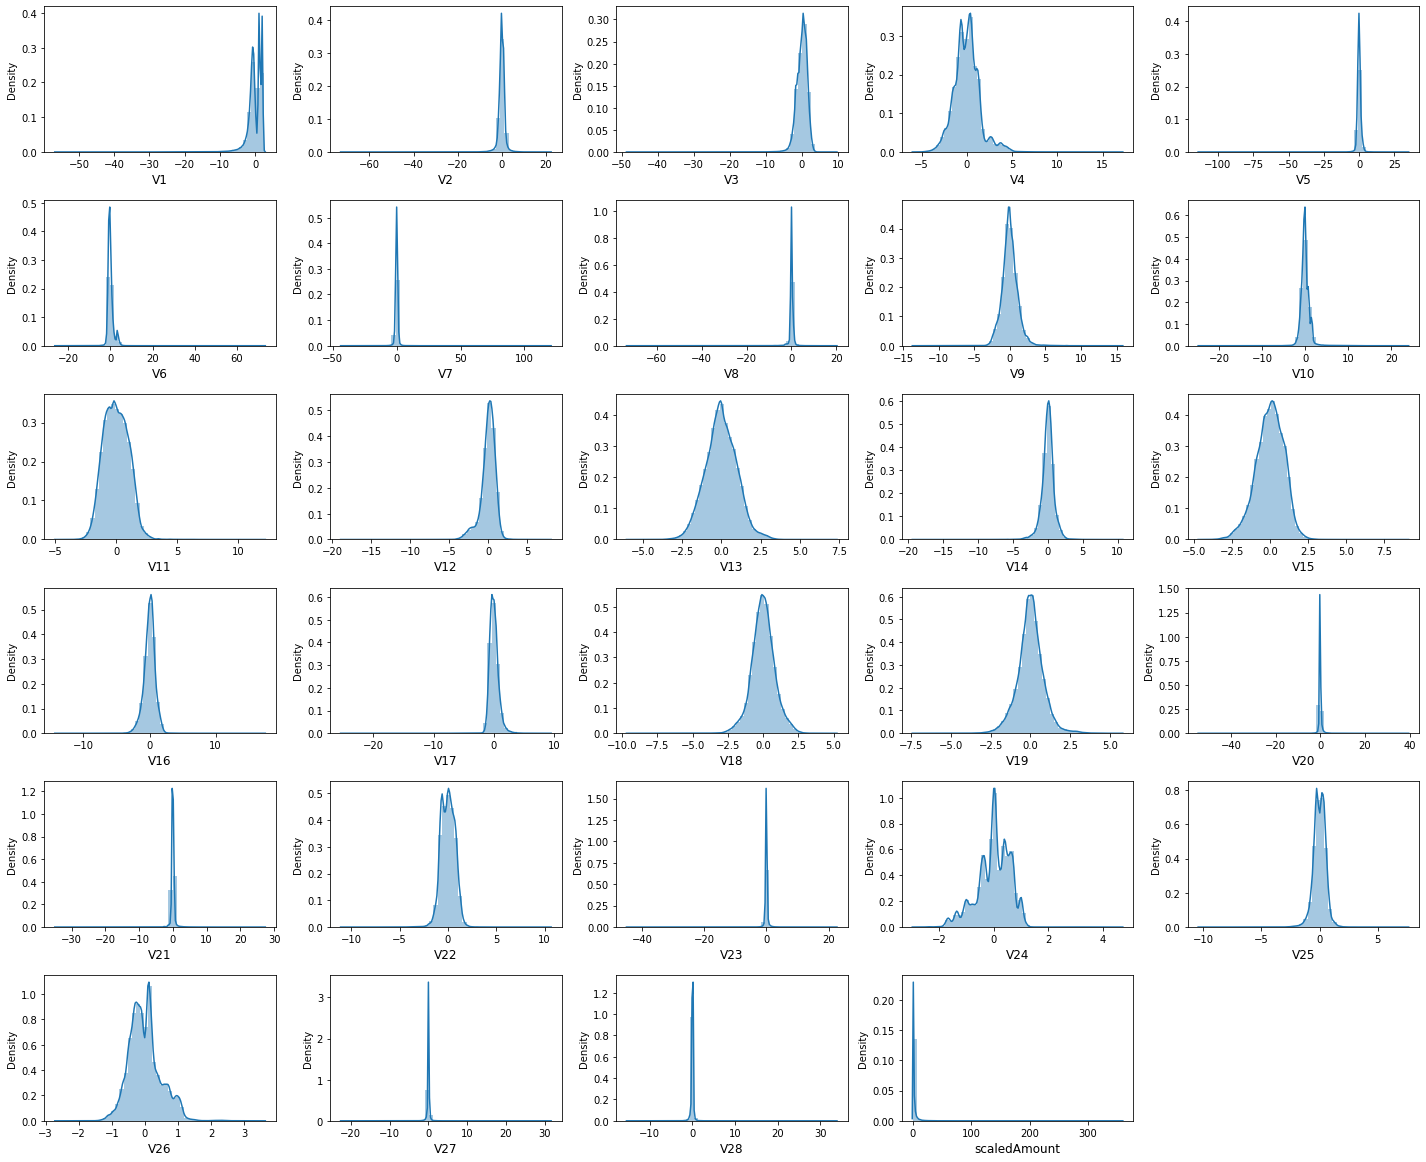

In [20]:
# class0 = df.loc[df['Class']==0]
# class1 = df.loc[df['Class']==1]

def displot_variables(cols,X):
    
    plt.figure(figsize=(20, 40))
    for i in range(0,len(cols)):
        plt.subplot(15,5,i+1)
        sns.distplot(X[cols[i]])
#         sns.kdeplot(class0[cols[i]],bw=0.5,label="Class 0")
#         sns.kdeplot(class1[cols[i]],bw=0.5,label="Class 1")
        plt.xlabel(cols[i], fontsize=12)
    plt.tight_layout()
    plt.show()
    
displot_variables(cols,df[cols])

### Power transformation: <br>
- <b>Using Power Transformer package present in the <b>preprocessing library provided by sklearn to make distribution more gaussian

In [21]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import PowerTransformer
from matplotlib import pyplot


# perform a yeo-johnson transform of the dataset
df_transformed = df.drop(['Class'],axis=1)
transformed_cols = df_transformed.columns
pt = PowerTransformer(method='yeo-johnson',copy=False)
data = pt.fit_transform(df_transformed)
# convert the array back to a dataframe
dataset = pd.DataFrame(data,columns=transformed_cols)
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaledAmount
0,-0.904815,-0.131503,2.176074,0.983588,-0.256110,0.459227,0.193516,0.020305,0.380443,0.127074,-0.513088,-0.774671,-0.997398,-0.404755,1.711206,-0.600774,0.215544,0.009991,0.503467,0.323559,-0.007670,0.366644,-0.189647,0.015102,0.211929,-0.323884,0.323027,-0.053332,1.338214
1,0.626390,0.093067,-0.035062,0.387928,0.031947,0.045846,-0.063874,0.006711,-0.184488,-0.115195,1.523934,1.296242,0.498814,-0.232720,0.674890,0.491958,-0.175639,-0.238612,-0.169496,-0.093203,-0.298760,-0.884170,0.153342,-0.637483,0.288440,0.353130,-0.035793,0.057491,-1.095159
2,-0.904242,-0.871858,1.381297,0.341811,-0.374492,1.320901,0.639714,0.172348,-1.453859,0.234324,0.640742,-0.104954,0.724952,-0.255865,2.872435,-2.809663,1.383126,-0.165261,-2.838493,0.680896,0.357879,1.069496,1.501808,-1.133450,-0.653607,-0.209953,-0.151417,-0.173752,1.768317
3,-0.742857,-0.202760,1.401049,-0.581136,-0.019151,0.983351,0.191907,0.309141,-1.319689,-0.008922,-0.179270,0.026987,0.517344,-0.381222,-0.720269,-1.194700,-0.829186,2.435570,-1.528799,-0.273184,-0.133275,-0.013060,-0.317680,-1.756645,1.276336,-0.399896,0.144087,0.201524,1.212715
4,-0.823641,0.530197,1.160592,0.357540,-0.305614,0.187360,0.479194,-0.331706,0.769520,0.718432,-0.798770,0.496185,1.343525,-1.168769,0.138162,-0.580731,-0.319406,-0.066425,0.986458,0.528646,0.004660,1.107811,-0.232990,0.145885,-0.429239,1.053668,0.541488,0.669838,0.774857


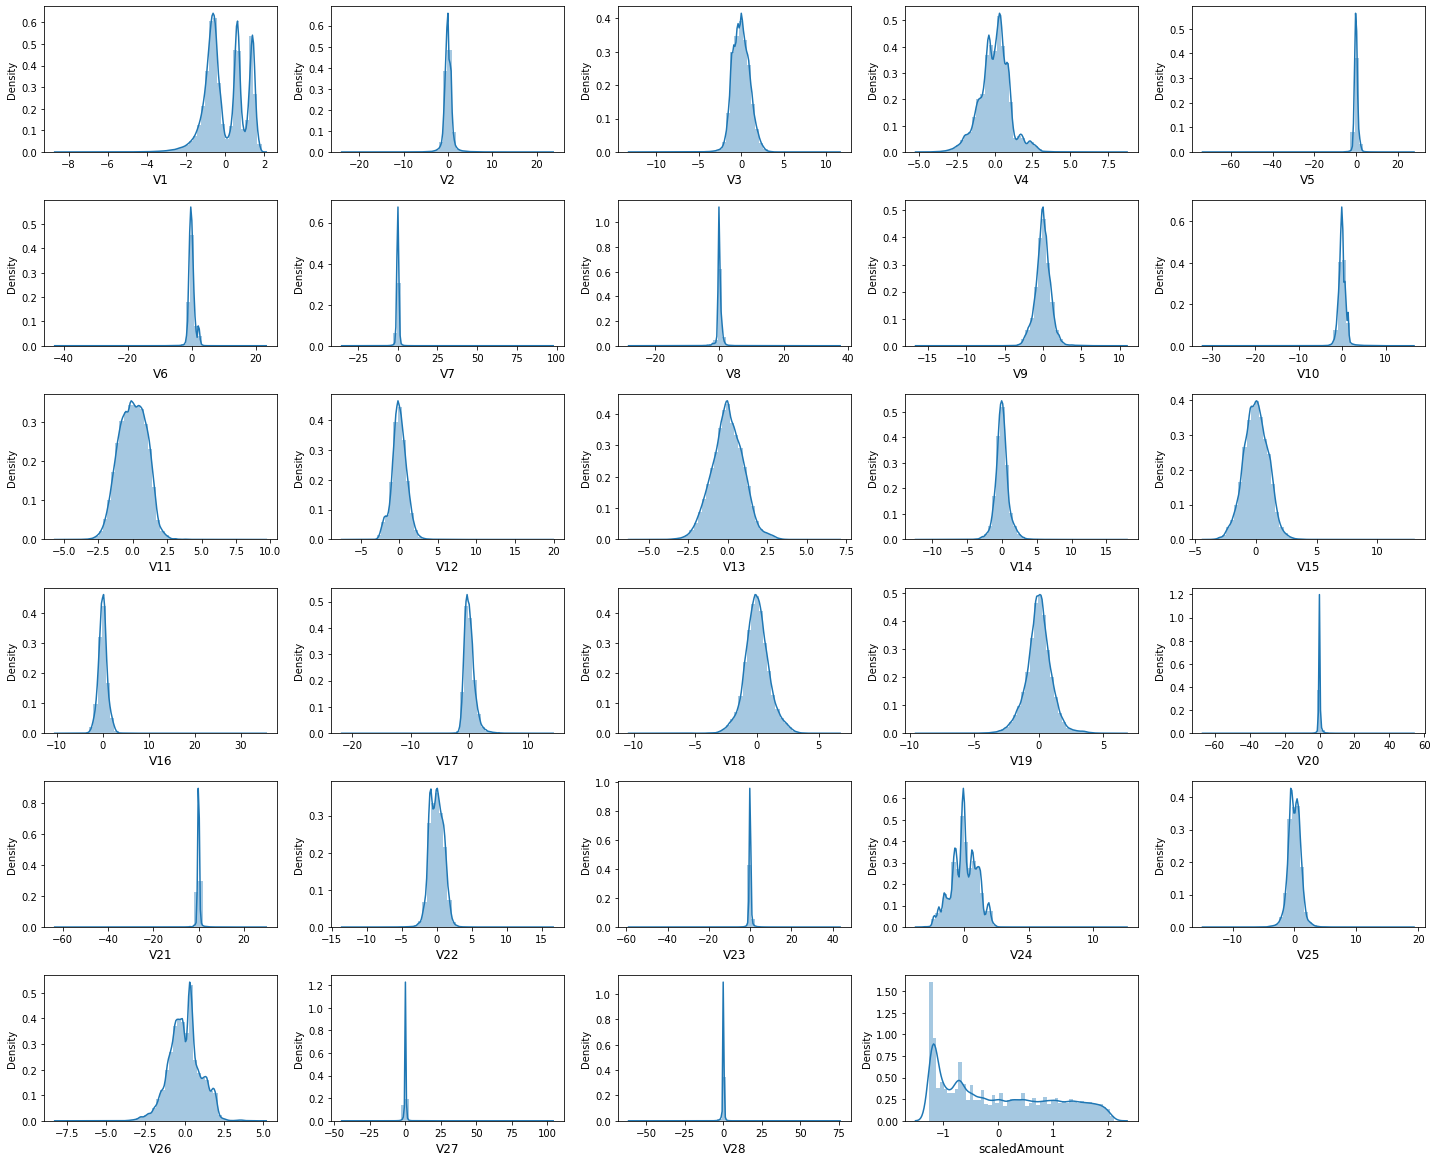

In [22]:
# plot the histogram of a variable from the dataset again to see the result 
# class0 = df.loc[df['Class']==0]
# class1 = df.loc[df['Class']==1]

def displot_variables(cols,dataset):
    
    plt.figure(figsize=(20, 40))
    for i in range(0,len(cols)):
        plt.subplot(15,5,i+1)
        sns.distplot(dataset[cols[i]])
#         sns.kdeplot(class0[cols[i]],bw=0.5,label="Class 0")
#         sns.kdeplot(class1[cols[i]],bw=0.5,label="Class 1")
        plt.xlabel(cols[i], fontsize=12)
    plt.tight_layout()
    plt.show()
    
displot_variables(cols,dataset)

In [23]:
skewed_data = dataset.skew(axis = 0).sort_values(ascending=False)#, skipna = True) 
skewed_data

V27             3.465031
V7              2.594575
V8              2.297590
V28             1.069193
scaledAmount    0.417453
V2              0.334852
V12             0.158932
V16             0.137437
V24             0.112492
V14             0.105966
V25             0.077895
V11             0.060890
V4              0.018930
V19             0.015231
V15             0.013157
V13             0.006134
V26            -0.024102
V22            -0.025686
V9             -0.048343
V18            -0.059630
V3             -0.079980
V1             -0.218003
V23            -0.249209
V17            -0.791141
V20            -0.923653
V5             -1.170100
V10            -1.318334
V6             -1.937469
V21            -1.966863
dtype: float64

**Observations:<br>**

We see that skewness has been reduced to a certain extent.

### Splitting the data into train & test data

In [24]:
y= df.Class
X=dataset

In [25]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,train_size=0.7,random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [26]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


## Model Building (Imbalanced dataset)
- Building different models on the imbalanced dataset and verifying the result

#### Creating a reusable function - model_evaluation_metrics to display the metrics in tabular format

In [27]:
def model_evaluation_metrics(results,modelname,actual,predicted):
    cm1 = metrics.confusion_matrix(actual,predicted)
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    tempResults = pd.DataFrame({'Method':modelname,
                                'Accuracy':[metrics.accuracy_score(actual,predicted)],
                                'Specificity':speci,
                                'Sensitivity':sensi,
                                'Precision': [metrics.precision_score(actual,predicted)], 
                                'Recall': [metrics.recall_score(actual,predicted)],
                                'AUC': [metrics.roc_auc_score(actual,predicted)]})
    results = pd.concat([results, tempResults])
    return results

### Logistic Regression

In [28]:
results=pd.DataFrame()
logModel = LogisticRegression(class_weight='balanced')

kf =StratifiedKFold(n_splits=3, shuffle=True, random_state=1) # Define the split - into 2 folds 
kf.get_n_splits(X_train) # returns the number of splitting iterations in the cross-validator
print(kf)

i=0
for train_index, test_index in kf.split(X_train,y_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv =  X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

    logModel.fit(X_train_cv,y_train_cv)
    y_test_pred = logModel.predict(X_test_cv)
    
    model = "Logistitic Reg CV " + str(i)
    i=i+1
    results=model_evaluation_metrics(results,model,y_test_pred,y_test_cv)

results

StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
TRAIN: [     0      1      2 ... 199359 199360 199363] TEST: [     3     14     16 ... 199357 199361 199362]
TRAIN: [     1      3      4 ... 199357 199361 199362] TEST: [     0      2      5 ... 199359 199360 199363]
TRAIN: [     0      2      3 ... 199361 199362 199363] TEST: [     1      4      8 ... 199354 199355 199356]


,Method,Accuracy,Specificity,Sensitivity,Precision,Recall,AUC
0,Logistitic Reg CV 0,0.977549,0.999769,0.063412,0.869565,0.063412,0.531590
0,Logistitic Reg CV 1,0.973140,0.999830,0.055378,0.904348,0.055378,0.527604
0,Logistitic Reg CV 2,0.970807,0.999907,0.052889,0.947368,0.052889,0.526398


In [29]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : [0.1,0.001,0.0001],
    'solver' : ['liblinear']
    }
]

grid_search = GridSearchCV(estimator = logModel,
                   param_grid = param_grid,
                   scoring = 'roc_auc',
                   cv = folds,
                   verbose = True,
                   return_train_score=True,
                   n_jobs=-1)

grid_search.fit(X_train,y_train)

final_model = grid_search.best_estimator_
final_model.fit(X_train,y_train)
print('We can get best roc_auc of',grid_search.best_score_,'using',grid_search.best_params_)
y_test_pred = final_model.predict(X_test)

model = "Logistitic Reg Tuned"

results=model_evaluation_metrics(results,model,y_test_pred,y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.4min finished


We can get best roc_auc of 0.9805267571543872 using {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}


In [30]:
results

,Method,Accuracy,Specificity,Sensitivity,Precision,Recall,AUC
0,Logistitic Reg CV 0,0.977549,0.999769,0.063412,0.869565,0.063412,0.531590
0,Logistitic Reg CV 1,0.973140,0.999830,0.055378,0.904348,0.055378,0.527604
0,Logistitic Reg CV 2,0.970807,0.999907,0.052889,0.947368,0.052889,0.526398
0,Logistitic Reg Tuned,0.979554,0.999785,0.069930,0.878378,0.069930,0.534857


### Random Forest Classifier

In [34]:
folds = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)
rfModel = RandomForestClassifier(random_state=0, class_weight="balanced")

kf =StratifiedKFold(n_splits=3, shuffle=True, random_state=1) # Define the split - into 2 folds 
kf.get_n_splits(X_train) # returns the number of splitting iterations in the cross-validator
print(kf)

i=0
for train_index, test_index in kf.split(X_train,y_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv =  X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
   
    rfModel.fit(X_train_cv,y_train_cv)
    y_test_pred = rfModel.predict(X_test_cv)

    model = "Random Forest CV " + str(i)
    i=i+1
    results=model_evaluation_metrics(results,model,y_test_pred,y_test_cv)
    

StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
TRAIN: [     0      1      2 ... 199359 199360 199363] TEST: [     3     14     16 ... 199357 199361 199362]
TRAIN: [     1      3      4 ... 199357 199361 199362] TEST: [     0      2      5 ... 199359 199360 199363]
TRAIN: [     0      2      3 ... 199361 199362 199363] TEST: [     1      4      8 ... 199354 199355 199356]


In [35]:
results

,Method,Accuracy,Specificity,Sensitivity,Precision,Recall,AUC
0,Logistitic Reg CV 0,0.977549,0.999769,0.063412,0.869565,0.063412,0.531590
0,Logistitic Reg CV 1,0.973140,0.999830,0.055378,0.904348,0.055378,0.527604
0,Logistitic Reg CV 2,0.970807,0.999907,0.052889,0.947368,0.052889,0.526398
0,Logistitic Reg Tuned,0.979554,0.999785,0.069930,0.878378,0.069930,0.534857
0,Random Forest CV 0,0.999503,0.999533,0.976744,0.730435,0.976744,0.988139
0,Random Forest CV 1,0.999443,0.999518,0.943182,0.721739,0.943182,0.971350
0,Random Forest CV 2,0.999518,0.999563,0.965909,0.745614,0.965909,0.982736


In [ ]:
folds = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)

param_grid = {
    'max_depth': [7,10],
    'min_samples_leaf': [100,110],
    'min_samples_split': [250, 350],
    'n_estimators': [150], 
    'max_features': [int(round(np.sqrt(X_train.shape[1]))),14]
}

grid_search = GridSearchCV(estimator = rfModel,
                   param_grid = param_grid,
                   scoring = 'roc_auc',
                   cv = folds,
                   verbose = True,
                   return_train_score=True,
                   n_jobs=-1)

grid_search.fit(X_train,y_train)
final_model = grid_search.best_estimator_
final_model.fit(X_train,y_train)
print(' We can get best roc_auc of',grid_search.best_score_,'using',grid_search.best_params_)
y_test_pred = final_model.predict(X_test)

model = "Random Forest Tuned " 

results=model_evaluation_metrics(results,model,y_test_pred,y_test)


In [ ]:
results

**Summary:<br>**

By observing the above evaluation metrics from both "Logistic Regression tuned" and "Random Forest Tuned",Random Forest model proved to be efficient with optimal values of Precision and Recall and an AUC score of 98% even on imbalanced dataset.<br>

Logistic Regression ,on the other hand,proved to be inefficient with randomized classification with AUC score around 50% only.<br>

This also makes a point that Random Forest classifiers are best suited for heavily imbalanced data.


 

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler #- import the packages

X = dataset
y = df.Class

over = RandomOverSampler(random_state=42)

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,stratify=y,random_state=100)
X_train_over, y_train_over = over.fit_resample(X_train, y_train)

### Random Oversampling - Logistic Regression 

In [ ]:
results = pd.DataFrame()
logModel_over = LogisticRegression(class_weight='balanced')

kf =StratifiedKFold(n_splits=3, shuffle=True, random_state=1) # Define the split - into 2 folds 
kf.get_n_splits(X_train) # returns the number of splitting iterations in the cross-validator
print(kf)

folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
i=0
for train_index, test_index in kf.split(X_train,y_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    
    X_train_cv, X_test_cv =  X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    X_train_cv_over, y_train_cv_over = over.fit_resample(X_train_cv, y_train_cv)
    
    logModel_over.fit(X_train_cv_over,y_train_cv_over)
    y_test_pred = logModel_over.predict(X_test_cv)
    
    model = "Logistitic Reg OverSample CV" + str(i)
    i=i+1
    results=model_evaluation_metrics(results,model,y_test_pred,y_test_cv)
    

StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
TRAIN: [     0      1      2 ... 199359 199360 199363] TEST: [     3     14     16 ... 199357 199361 199362]
TRAIN: [     1      3      4 ... 199357 199361 199362] TEST: [     0      2      5 ... 199359 199360 199363]
TRAIN: [     0      2      3 ... 199361 199362 199363] TEST: [     1      4      8 ... 199354 199355 199356]


In [ ]:
results

,Method,Accuracy,Specificity,Sensitivity,Precision,Recall,AUC
0,Logistitic Reg OverSample CV0,0.977594,0.999769,0.063532,0.869565,0.063532,0.531651
0,Logistitic Reg OverSample CV1,0.972809,0.999830,0.054737,0.904348,0.054737,0.527283
0,Logistitic Reg OverSample CV2,0.970867,0.999907,0.052993,0.947368,0.052993,0.526450


In [ ]:
results = pd.DataFrame()

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : [0.1,0.001,0.0001],
    'solver' : ['liblinear']
    }
]

grid_search = GridSearchCV(estimator = logModel_over,
                   param_grid = param_grid,
                   scoring = 'roc_auc',
                   cv = folds,
                   verbose = True,
                   return_train_score=True,
                   n_jobs=-1)

grid_search.fit(X_train_over,y_train_over)

final_model = grid_search.best_estimator_
final_model.fit(X_train_over,y_train_over)
print(str(i)+'We can get best roc_auc of',grid_search.best_score_,'using',grid_search.best_params_)
y_test_pred = final_model.predict(X_test)

model = "Logistitic Reg Oversample Tuned"

results=model_evaluation_metrics(results,model,y_test_pred,y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


3We can get best roc_auc of 0.9882493075985908 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
results

,Method,Accuracy,Specificity,Sensitivity,Precision,Recall,AUC
0,Logistitic Reg Oversample Tuned,0.974556,0.999808,0.057642,0.891892,0.057642,0.528725


### Random Oversampling - Random Forest

In [ ]:
results = pd.DataFrame()
rfModel_over = RandomForestClassifier(random_state=0, class_weight="balanced")


kf =StratifiedKFold(n_splits=3, shuffle=True, random_state=1) # Define the split - into 2 folds 
kf.get_n_splits(X_train) # returns the number of splitting iterations in the cross-validator
print(kf)

i=0
for train_index, test_index in kf.split(X_train,y_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv =  X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    X_train_cv_over, y_train_cv_over = over.fit_resample(X_train_cv, y_train_cv)

    rfModel_over.fit(X_train_cv_over,y_train_cv_over)
    y_test_pred = rfModel_over.predict(X_test_cv)
    
    model = "Random Forest Over Sampled CV" + str(i)
    i=i+1
    results=model_evaluation_metrics(results,model,y_test_pred,y_test_cv)

StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
TRAIN: [     0      1      2 ... 199359 199360 199363] TEST: [     3     14     16 ... 199357 199361 199362]
TRAIN: [     1      3      4 ... 199357 199361 199362] TEST: [     0      2      5 ... 199359 199360 199363]
TRAIN: [     0      2      3 ... 199361 199362 199363] TEST: [     1      4      8 ... 199354 199355 199356]


In [ ]:
results

,Method,Accuracy,Specificity,Sensitivity,Precision,Recall,AUC
0,Random Forest Over Sampled CV0,0.999579,0.999653,0.948454,0.800000,0.948454,0.974054
0,Random Forest Over Sampled CV1,0.999458,0.999563,0.924731,0.747826,0.924731,0.962147
0,Random Forest Over Sampled CV2,0.999549,0.999608,0.956522,0.771930,0.956522,0.978065


In [ ]:
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

param_grid = {
    'max_depth': [7,10],
    'min_samples_leaf': [100,110],
    'min_samples_split': [250, 350],
    'n_estimators': [150], 
    'max_features': [int(round(np.sqrt(X_train_over.shape[1]))),14]
}

grid_search = GridSearchCV(estimator = rfModel_over,
                   param_grid = param_grid,
                   scoring = 'roc_auc',
                   cv = folds,
                   verbose = True,
                   return_train_score=True,
                   n_jobs=-1)

grid_search.fit(X_train_over,y_train_over)
final_model = grid_search.best_estimator_
final_model.fit(X_train_over,y_train_over)
print(' We can get best roc_auc of',grid_search.best_score_,'using',grid_search.best_params_)
y_test_pred = final_model.predict(X_test)

model = "Random Forest Oversample Tuned " 

results=model_evaluation_metrics(results,model,y_test_pred,y_test)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


In [ ]:
results

**Summary - Oversampled data:<br>**
    
In this particular scenario,the datapoints from minority class have been increased using the "Random Over Sampling" technique.As a <br>
part of this,the algorithm tries to create data points for the minority class simply by duplicating the data points.Here,no new information<br>
is added.
    
After building models on the oversampled data and observing the above evaluation metrics from both "Logistic Regression" and "Random Forest",<br>
Random Forest model yet again proved to be efficient with optimal values of Precision and Recall and an AUC score of 98%.<br>

Logistic Regression ,on the other hand,proved to be inefficient with randomized classification with AUC score around 50% only.


 

### SMOTE


#### Printing the class distribution after applying SMOTE 

In [ ]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]
X_train_smote_1.iloc[:, 0]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaledAmount
199364,-0.848069,3.374639,-3.169018,4.166125,-0.477043,-1.308192,-2.937678,2.108939,-4.337704,-5.221144,4.243770,-3.570767,-0.095348,-7.556044,-0.152884,-2.614703,-3.443201,-0.073148,1.498097,0.824997,0.865008,-0.369439,0.121752,-1.244183,-0.021518,1.106095,1.322074,0.133619,-1.201024
199365,-2.094877,2.207376,-2.631536,2.651087,-2.942110,-1.008061,-4.055328,2.345472,-1.909853,-6.952632,3.263576,-4.383342,0.267686,-6.225459,0.077033,-5.612669,-9.864656,-4.624534,2.477587,-0.158736,1.095401,-0.358380,-0.338039,0.029090,0.092740,-0.810509,-1.129270,1.790921,0.695356
199366,1.226122,0.470682,-0.882879,2.436317,0.641262,0.659926,-0.332275,0.235373,-0.659504,0.393804,0.710009,-0.188551,0.433679,-2.677301,-1.083503,3.362529,0.918247,2.293160,-2.013771,-0.123739,0.033206,0.121439,0.125041,-0.367295,-0.318921,0.075131,0.079388,0.081336,-0.439335
199367,-1.690969,3.361109,-2.232323,3.075087,-3.051780,-0.799809,-5.556785,3.521411,-4.611577,-7.747880,2.960273,-4.276646,1.624845,-6.015512,0.662612,-6.371133,-12.835838,-5.545209,3.451008,1.019533,2.082641,0.994536,-0.134426,-0.095646,-0.101363,0.443567,1.918392,1.594070,-0.662235
199368,-5.974518,16.820401,-9.575413,3.794087,-14.921250,-5.435916,-16.427067,37.320568,-3.731118,-8.789544,3.374698,-3.392711,1.436130,-3.857973,-0.211048,-4.440152,-10.383677,-5.160468,0.705399,2.270874,2.390930,-3.010074,-2.283134,0.220550,4.820480,-0.369530,3.225791,1.096464,1.060474


In [ ]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]
X_train_smote_1.iloc[:X_train_1.shape[0], 0]

199364   -0.848069
199365   -2.094877
199366    1.226122
199367   -1.690969
199368   -5.974518
199369   -2.697787
199370   -0.859061
199371   -0.532379
199372   -0.094365
199373   -1.211259
199374   -0.303383
199375   -4.263678
199376   -1.904816
199377   -1.059742
199378   -3.618663
199379   -0.540153
199380   -0.667751
199381    0.260604
199382   -2.006322
199383    1.368573
199384   -2.673199
199385   -3.613411
199386   -1.361501
199387   -0.745333
199388   -3.231632
199389   -0.306215
199390   -0.279893
199391   -1.175722
199392   -3.614363
199393   -3.422981
199394    0.123896
199395   -2.091476
199396    0.581877
199397   -1.404292
199398   -1.136312
199399   -3.441594
199400    0.238444
199401   -0.902298
199402   -0.510725
199403   -5.869708
199404   -1.694981
199405   -0.229766
199406   -0.483746
199407   -1.383086
199408   -0.102969
199409   -0.314700
199410   -1.071967
199411   -0.279565
199412    0.394393
199413   -3.916405
199414   -0.862732
199415   -0.756375
199416    0.

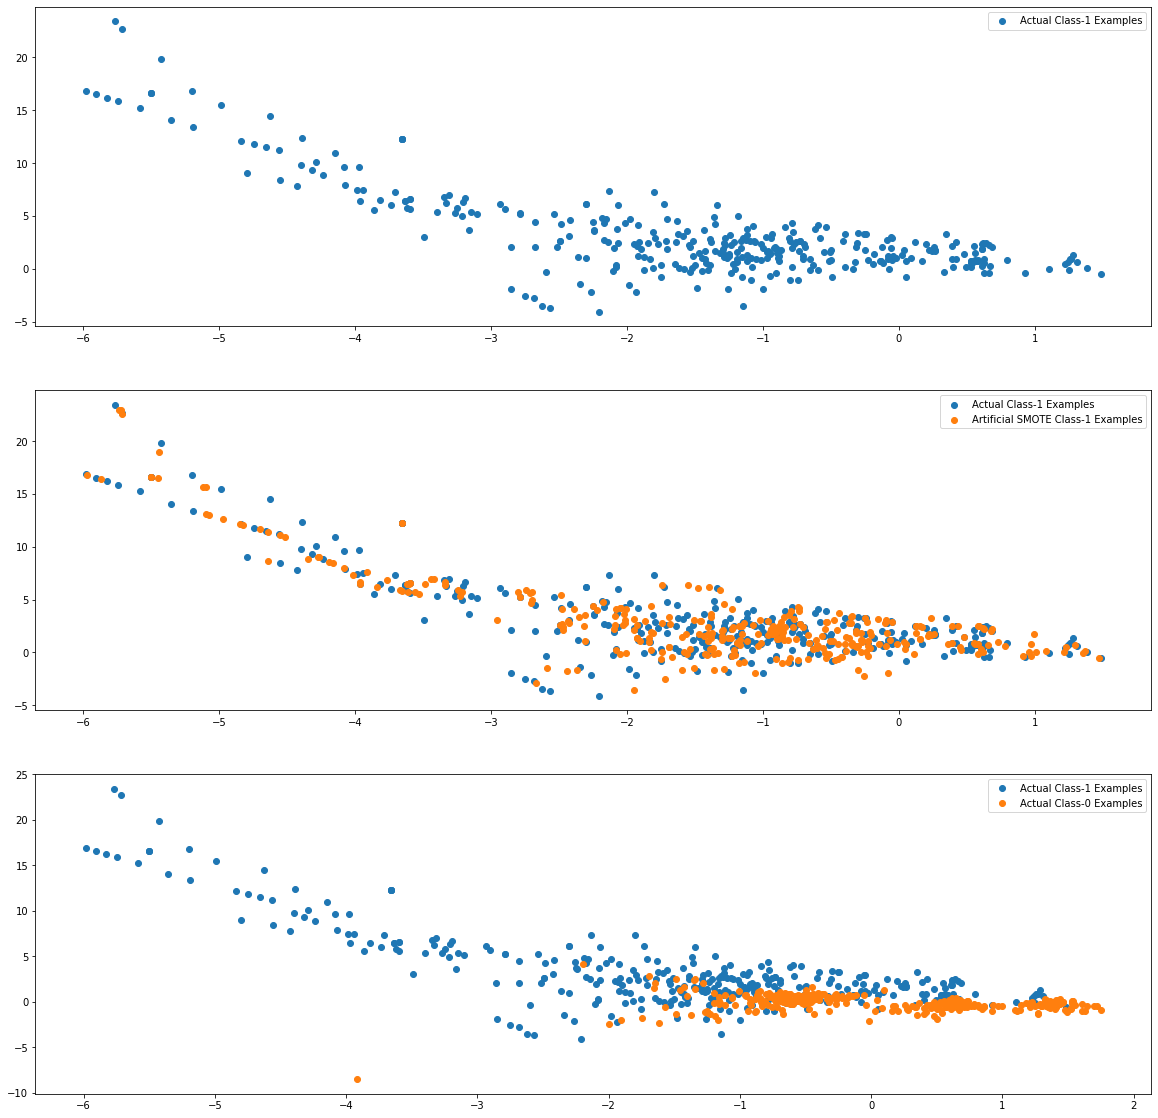

In [52]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

#### Logistic Regression (SMOTE)

In [ ]:
results= pd.DataFrame()
logModel_SMOTE = LogisticRegression(class_weight='balanced')

kf =StratifiedKFold(n_splits=3, shuffle=True, random_state=1) # Define the split - into 2 folds 
kf.get_n_splits(X_train) # returns the number of splitting iterations in the cross-validator
print(kf)

folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
i=0
for train_index, test_index in kf.split(X_train,y_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    
    X_train_cv, X_test_cv =  X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    X_train_cv_smote, y_train_cv_smote = sm.fit_resample(X_train_cv, y_train_cv)
    
    logModel_SMOTE.fit(X_train_cv_smote,y_train_cv_smote)
    y_test_pred = logModel_SMOTE.predict(X_test_cv)
    
    model = "Logistitic Reg SMOTE CV" + str(i)
    i=i+1
    results=model_evaluation_metrics(results,model,y_test_pred,y_test_cv)
    
results

StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
TRAIN: [     0      1      2 ... 199359 199360 199363] TEST: [     3     14     16 ... 199357 199361 199362]
TRAIN: [     1      3      4 ... 199357 199361 199362] TEST: [     0      2      5 ... 199359 199360 199363]
TRAIN: [     0      2      3 ... 199361 199362 199363] TEST: [     1      4      8 ... 199354 199355 199356]


,Method,Accuracy,Specificity,Sensitivity,Precision,Recall,AUC
0,Logistitic Reg SMOTE CV0,0.974885,0.999784,0.057517,0.878261,0.057517,0.528650
0,Logistitic Reg SMOTE CV1,0.970190,0.999845,0.050578,0.913043,0.050578,0.525211
0,Logistitic Reg SMOTE CV2,0.971303,0.999891,0.053313,0.938596,0.053313,0.526602


In [ ]:
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : [0.1,0.001,0.0001],
    'solver' : ['liblinear']
    }
]

grid_search = GridSearchCV(estimator = logModel_SMOTE,
                   param_grid = param_grid,
                   scoring = 'roc_auc',
                   cv = folds,
                   verbose = True,
                   return_train_score=True,
                   n_jobs=-1)

grid_search.fit(X_train_smote,y_train_smote)

final_model = grid_search.best_estimator_
final_model.fit(X_train_smote,y_train_smote)
print(str(i)+'We can get best roc_auc of',grid_search.best_score_,'using',grid_search.best_params_)
y_test_pred = final_model.predict(X_test)

model = "Logistitic Reg SMOTE Tuned"

results=model_evaluation_metrics(results,model,y_test_pred,y_test)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   20.6s finished


3We can get best roc_auc of 0.9901868301496749 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
results

,Method,Accuracy,Specificity,Sensitivity,Precision,Recall,AUC
0,Logistitic Reg SMOTE CV0,0.974885,0.999784,0.057517,0.878261,0.057517,0.528650
0,Logistitic Reg SMOTE CV1,0.970190,0.999845,0.050578,0.913043,0.050578,0.525211
0,Logistitic Reg SMOTE CV2,0.971303,0.999891,0.053313,0.938596,0.053313,0.526602
0,Logistitic Reg SMOTE Tuned,0.973795,0.999807,0.056051,0.891892,0.056051,0.527929


#### Random Forest Classifier(SMOTE)

In [ ]:
rfModel_SMOTE = RandomForestClassifier(random_state=0, class_weight="balanced")


kf =StratifiedKFold(n_splits=3, shuffle=True, random_state=1) # Define the split - into 2 folds 
kf.get_n_splits(X_train) # returns the number of splitting iterations in the cross-validator
print(kf)

i=0
for train_index, test_index in kf.split(X_train,y_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv =  X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    X_train_cv_smote, y_train_cv_smote = sm.fit_resample(X_train_cv, y_train_cv)

    rfModel_SMOTE.fit(X_train_cv_smote,y_train_cv_smote)
    y_test_pred = rfModel_SMOTE.predict(X_test_cv)
    
    model = "Random Forest SMOTE CV" + str(i)
    i=i+1
    results=model_evaluation_metrics(results,model,y_test_pred,y_test_cv)

StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
TRAIN: [     0      1      2 ... 199359 199360 199363] TEST: [     3     14     16 ... 199357 199361 199362]
TRAIN: [     1      3      4 ... 199357 199361 199362] TEST: [     0      2      5 ... 199359 199360 199363]
TRAIN: [     0      2      3 ... 199361 199362 199363] TEST: [     1      4      8 ... 199354 199355 199356]


In [ ]:
results

,Method,Accuracy,Specificity,Sensitivity,Precision,Recall,AUC
0,Logistitic Reg SMOTE CV0,0.974885,0.999784,0.057517,0.878261,0.057517,0.528650
0,Logistitic Reg SMOTE CV1,0.970190,0.999845,0.050578,0.913043,0.050578,0.525211
0,Logistitic Reg SMOTE CV2,0.971303,0.999891,0.053313,0.938596,0.053313,0.526602
0,Logistitic Reg SMOTE Tuned,0.973795,0.999807,0.056051,0.891892,0.056051,0.527929
0,Random Forest SMOTE CV0,0.999503,0.999683,0.886792,0.817391,0.886792,0.943238
0,Random Forest SMOTE CV1,0.999413,0.999623,0.865385,0.782609,0.865385,0.932504
0,Random Forest SMOTE CV2,0.999534,0.999684,0.902913,0.815789,0.902913,0.951298


**Summary - Sampled using SMOTE:<br>**
    
In this particular scenario,new synthetic data points for the minority class are created by an oversampling technique call SMOTE where the new datapoints lie vectorially between the existing minority class data points.
    
After building models on the oversampled data and observing the above evaluation metrics from both "Logistic Regression" and "Random Forest",<br>
Random Forest model yet again proved to be efficient with optimal values of Precision and Recall and an AUC score of 95% 

Logistic Regression even after tuning ,on the other hand,proved to be inefficient with randomized classification with AUC score around 50% only.


 

In [44]:
results = pd.DataFrame()
from imblearn.under_sampling import RandomUnderSampler
import imblearn
from imblearn.over_sampling import SMOTE
print(imblearn.__version__)

rfModel_SMOTE = RandomForestClassifier(random_state=0, class_weight="balanced")

over = SMOTE(sampling_strategy=0.3,random_state=100)
#over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.8,random_state=100)

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,stratify=y,random_state=100)
train_cols=X_train.columns
X_train_smote, y_train_smote = over.fit_resample(X_train, y_train)
X_train_under, y_train_under = under.fit_resample(X_train_smote, y_train_smote)

folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

param_grid = {
    'max_depth': [7,10],
    'min_samples_leaf': [100,110],
    'min_samples_split': [250, 350],
    'n_estimators': [150], 
    'max_features': [int(round(np.sqrt(X_train_under.shape[1]))),14]
}

grid_search = GridSearchCV(estimator = rfModel_SMOTE,
                   param_grid = param_grid,
                   scoring = 'roc_auc',
                   cv = folds,
                   verbose = True,
                   return_train_score=True,
                   n_jobs=-1)

grid_search.fit(X_train_under,y_train_under)
final_model = grid_search.best_estimator_
final_model.fit(X_train_under,y_train_under)
print(' We can get best roc_auc of',grid_search.best_score_,'using',grid_search.best_params_)
y_test_pred = final_model.predict(X_test)

model = "Random Forest SMOTE Tuned " 

results=model_evaluation_metrics(results,model,y_test_pred,y_test)

0.4.3
Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 64.9min finished


 We can get best roc_auc of 0.998768052905039 using {'max_depth': 10, 'max_features': 14, 'min_samples_leaf': 100, 'min_samples_split': 250, 'n_estimators': 150}


In [45]:
results

,Method,Accuracy,Specificity,Sensitivity,Precision,Recall,AUC
0,Random Forest SMOTE Tuned,0.994265,0.999764,0.214047,0.864865,0.214047,0.606906


In [ ]:

folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

sampled_df =pd.DataFrame(X_train_under,y_train_under).reset_index()
sampled_df['Class'].value_counts(normalize=True)

param_grid = {
    'max_depth': [7,10],
    'min_samples_leaf': [100,110],
    'min_samples_split': [250, 350],
    'n_estimators': [150], 
    'max_features': [int(round(np.sqrt(X_train_under.shape[1]))),14]
}

grid_search = GridSearchCV(estimator = rfModel_SMOTE,
                   param_grid = param_grid,
                   scoring = 'roc_auc',
                   cv = folds,
                   verbose = True,
                   return_train_score=True,
                   n_jobs=-1)

grid_search.fit(X_train_under,y_train_under)
final_model = grid_search.best_estimator_
final_model.fit(X_train_under,y_train_under)
print(' We can get best roc_auc of',grid_search.best_score_,'using',grid_search.best_params_)
y_test_pred = final_model.predict(X_test)

model = "Random Forest SMOTE Tuned " 

results=model_evaluation_metrics(results,model,y_test_pred,y_test)

#### Printing the class distribution after applying ADASYN

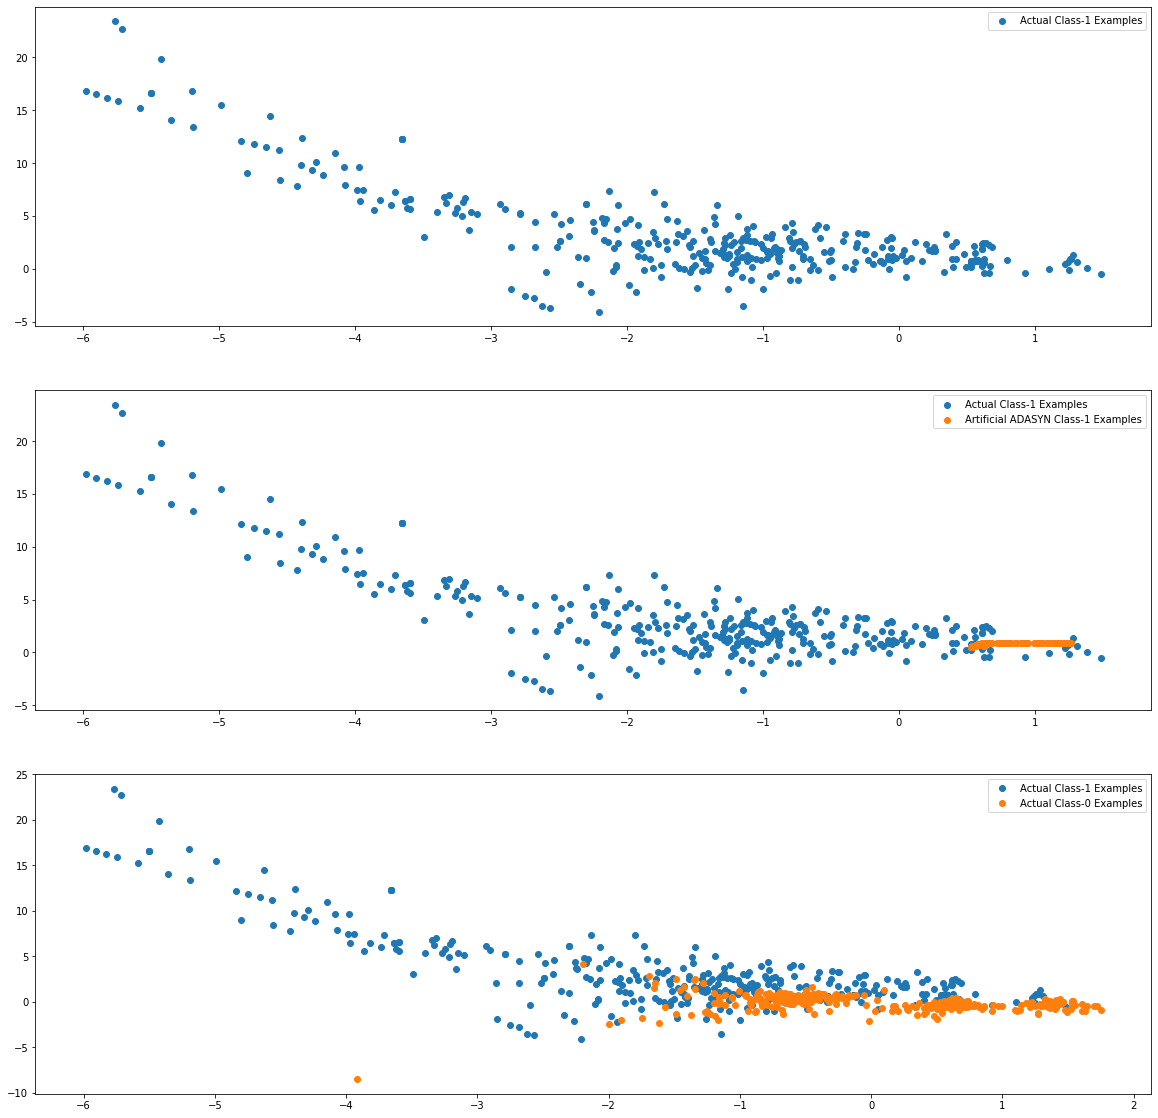

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1], label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Logistic Regression(ADASYN)

In [ ]:
results= pd.DataFrame()
logModel_ADASYN = LogisticRegression(class_weight='balanced')

kf =StratifiedKFold(n_splits=3, shuffle=True, random_state=1) # Define the split - into 2 folds 
kf.get_n_splits(X_train) # returns the number of splitting iterations in the cross-validator
print(kf)

folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)
i=0
for train_index, test_index in kf.split(X_train,y_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    
    X_train_cv, X_test_cv =  X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    X_train_cv_adasyn, y_train_cv_adasyn = ada.fit_resample(X_train_cv, y_train_cv)
    
    logModel_ADASYN.fit(X_train_cv_adasyn,y_train_cv_adasyn)
    y_test_pred = logModel_ADASYN.predict(X_test_cv)
    
    model = "Logistitic Reg ADA CV" + str(i)
    i=i+1
    results=model_evaluation_metrics(results,model,y_test_pred,y_test_cv)
    
results

StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
TRAIN: [     0      1      2 ... 199359 199360 199363] TEST: [     3     14     16 ... 199357 199361 199362]
TRAIN: [     1      3      4 ... 199357 199361 199362] TEST: [     0      2      5 ... 199359 199360 199363]
TRAIN: [     0      2      3 ... 199361 199362 199363] TEST: [     1      4      8 ... 199354 199355 199356]


,Method,Accuracy,Specificity,Sensitivity,Precision,Recall,AUC
0,Logistitic Reg ADA CV0,0.935550,0.999775,0.023112,0.878261,0.023112,0.511443
0,Logistitic Reg ADA CV1,0.915582,0.999885,0.018911,0.939130,0.018911,0.509398
0,Logistitic Reg ADA CV2,0.911458,0.999934,0.018364,0.964912,0.018364,0.509149


In [ ]:
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : [0.1,0.001,0.0001],
    'solver' : ['liblinear']
    }
]

grid_search = GridSearchCV(estimator = logModel_ADASYN,
                   param_grid = param_grid,
                   scoring = 'roc_auc',
                   cv = folds,
                   verbose = True,
                   return_train_score=True,
                   n_jobs=-1)

grid_search.fit(X_train_adasyn, y_train_adasyn)

final_model = grid_search.best_estimator_
final_model.fit(X_train_adasyn, y_train_adasyn)
print(str(i)+'We can get best roc_auc of',grid_search.best_score_,'using',grid_search.best_params_)
y_test_pred = final_model.predict(X_test)

model = "Logistitic Reg ADA Tuned"

results=model_evaluation_metrics(results,model,y_test_pred,y_test)

results

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   26.5s finished


3We can get best roc_auc of 0.9662305232562503 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


,Method,Accuracy,Specificity,Sensitivity,Precision,Recall,AUC
0,Logistitic Reg ADA CV0,0.935550,0.999775,0.023112,0.878261,0.023112,0.511443
0,Logistitic Reg ADA CV1,0.915582,0.999885,0.018911,0.939130,0.018911,0.509398
0,Logistitic Reg ADA CV2,0.911458,0.999934,0.018364,0.964912,0.018364,0.509149
0,Logistitic Reg ADA Tuned,0.911204,0.999871,0.017887,0.932432,0.017887,0.508879


### Random Forest Classifier(ADASYN)

In [ ]:
rfModel_ADA = RandomForestClassifier(random_state=0, class_weight="balanced")


kf =StratifiedKFold(n_splits=3, shuffle=True, random_state=1) # Define the split - into 2 folds 
kf.get_n_splits(X_train) # returns the number of splitting iterations in the cross-validator
print(kf)

i=0
for train_index, test_index in kf.split(X_train,y_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train_cv, X_test_cv =  X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    
    X_train_cv_adasyn, y_train_cv_adasyn = ada.fit_resample(X_train_cv, y_train_cv)

    rfModel_ADA.fit(X_train_cv_adasyn,y_train_cv_adasyn)
    y_test_pred = rfModel_ADA.predict(X_test_cv)
    
    model = "Random Forest ADA CV" + str(i)
    i=i+1
    results=model_evaluation_metrics(results,model,y_test_pred,y_test_cv)

StratifiedKFold(n_splits=3, random_state=1, shuffle=True)
TRAIN: [     0      1      2 ... 199359 199360 199363] TEST: [     3     14     16 ... 199357 199361 199362]
TRAIN: [     1      3      4 ... 199357 199361 199362] TEST: [     0      2      5 ... 199359 199360 199363]
TRAIN: [     0      2      3 ... 199361 199362 199363] TEST: [     1      4      8 ... 199354 199355 199356]


In [ ]:
results

,Method,Accuracy,Specificity,Sensitivity,Precision,Recall,AUC
0,Logistitic Reg ADA CV0,0.935550,0.999775,0.023112,0.878261,0.023112,0.511443
0,Logistitic Reg ADA CV1,0.915582,0.999885,0.018911,0.939130,0.018911,0.509398
0,Logistitic Reg ADA CV2,0.911458,0.999934,0.018364,0.964912,0.018364,0.509149
0,Logistitic Reg ADA Tuned,0.911204,0.999871,0.017887,0.932432,0.017887,0.508879
0,Random Forest ADA CV0,0.999458,0.999668,0.869159,0.808696,0.869159,0.934414
0,Random Forest ADA CV1,0.999413,0.999623,0.865385,0.782609,0.865385,0.932504
0,Random Forest ADA CV2,0.999488,0.999668,0.884615,0.807018,0.884615,0.942142


In [ ]:

folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=1)

param_grid = {
    'max_depth': [7,10],
    'min_samples_leaf': [100,110],
    'min_samples_split': [250, 350],
    'n_estimators': [150], 
    'max_features': [int(round(np.sqrt(X_train_over.shape[1]))),14]
}

grid_search = GridSearchCV(estimator = rfModel_SMOTE,
                   param_grid = param_grid,
                   scoring = 'roc_auc',
                   cv = folds,
                   verbose = True,
                   return_train_score=True,
                   n_jobs=-1)

grid_search.fit(X_train_adasyn,y_train_adasyn)
final_model = grid_search.best_estimator_
final_model.fit(X_train_adasyn,y_train_adasyn)
print(' We can get best roc_auc of',grid_search.best_score_,'using',grid_search.best_params_)
y_test_pred = final_model.predict(X_test)

model = "Random Forest ADA Tuned " 

results=model_evaluation_metrics(results,model,y_test_pred,y_test)

In [ ]:
results

**Summary - Sampled using ADASYN:<br>**
    
ADASYN(Adaptive Synthesis) technique is the most popular methodology to balance imbalanced datasets.In this approach,new synthetic data points for the minority class are created in such a way that the new datapoints lie vectorially between the existing minority class data points and they have a density distribution associated with them.
    
After building models on the oversampled data and observing the above evaluation metrics from both "Logistic Regression" and "Random Forest",<br>
Random Forest model yet again proved to be efficient with optimal values of Precision and Recall and an AUC score of 95% 

Logistic Regression even after tuning ,on the other hand,proved to be inefficient with randomized classification with AUC score around 50% only.

### Printing the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### Summary

By comparing the evaluation metric results ,we can conclude that the RandomForest classifier when balanced with ADASYN technique is efficient enough and can be used for future predictions with <br>

Optimal Recall of 88%           <br>
Optimal Precision of 80%           <br>
AUC score  of 95%           <br>

Since our aim here is to predict the fraudulent transactions ,the current recall ensures that 88% of them are correctly identified and precision of 80% ensures that out of the identified fraudulent cases,80% are actually fraudulent and 20% are be false positives,i.e,non-fraudulent .Banks can consider this margin as the primary goal is not to miss on the fraudulent transactions to the extent possible.This a judicious choice of evaluation metrics should be employed based on the problem at hand.





### Recommendations: <br>

1.This model can be employed to predict the fraudulent transactions on a daily basis.<br>
2.It is advisable,to recalibrate the model every quarterly to ensure that the model is trained on latest patterns in the transacations.<br>
3.Equip the Operational staff with required trainings to supplement the decisions of the model and take necessary steps.<br>
4.This model should be integration with transactional systems and can be used to generate warnings to the operational teams.